# the DeMoivre-LePlace Tradeoff
### This is an experiment to see the tradeoff between accuracy and speed of using the normal distribution to approximate the binomial distribution (the DeMoivre-LePlace Theorem)

imports

In [4]:
from helpers import probability_binomial, approx_P_binomial
import time
import numpy as np
import matplotlib.pyplot as plt

### Let's run a quick experiment to ensure everything is working properly

X is a RV modeled by the binomial distribution with parameters n = 4, p = 0.5 <br>
You can think of X as a series of 4 coin flips <br>
Let's calculate the probability that the number of heads we get is between [1 , 3]


In [5]:
probability_w_binomial = probability_binomial(1, 3, 4, 0.5)
print(f"The probability that we flip somewhere between 1 and 3 heads is {probability_w_binomial}")
approx_probability_w_normal = approx_P_binomial(1, 3, 4, 0.5)
print("The approximated probability that we flip somewhere between 1 and 3 heads using the \n"
      f"    normal distribution is {approx_probability_w_normal}")

The probability that we flip somewhere between 1 and 3 heads is 0.875
The approximated probability that we flip somewhere between 1 and 3 heads using the 
    normal distribution is 0.8663855974622838


### This discrepancy between the 2 probabilities is expected because the DeMoivre-Leplace Theorem states the the approximation works as n -> ∞ and as p -> 0

Let's calculate the time difference between the 2 using the same experiment.

In [6]:
start_time_binomial = time.time()
probability_binomial(1, 3, 4, 0.5)
end_time_binomial = time.time()
elapsed_time_binomial = end_time_binomial - start_time_binomial
print(f"The time for calculating the exact probability is {elapsed_time_binomial}")

start_time_approx = time.time()
approx_P_binomial(1, 3, 4, 0.5)
end_time_approx = time.time()
elapsed_time_approx = end_time_approx - start_time_approx
print(f"The time for calculating the approximate probability is {elapsed_time_approx}")

The time for calculating the exact probability is 0.0002796649932861328
The time for calculating the approximate probability is 0.0002689361572265625


### Let's make a function to compute probabilities and time taken to compute probabilities

In [7]:
def make_calculations(lower_bound: int, upper_bound: int, population_size: int, 
                      probability_success: float, verbose=False):
    # Exact probablity calculations (with binomial distribution)
    start_time_binomial = time.time()
    probability_w_binomial = probability_binomial(a=lower_bound, b=upper_bound, n=population_size, p=probability_success)
    end_time_binomial = time.time()
    elapsed_time_binomial = end_time_binomial - start_time_binomial
    
    # Approximation probability calculations (with normal distribution)
    start_time_approx = time.time()
    approx_probability_w_normal = approx_P_binomial(a=lower_bound, b=upper_bound, n=population_size, p=probability_success)
    end_time_approx = time.time()
    elapsed_time_approx = end_time_approx - start_time_approx

    if verbose:
      print(f"The probability that we flip somewhere between {lower_bound} and {upper_bound} heads is {probability_w_binomial}")
      print(f"The time for calculating the exact probability is {elapsed_time_binomial}\n")
      print(f"The time for calculating the approximate probability is {elapsed_time_approx}")
      print(f"The approximated probability that we flip somewhere between {lower_bound} and {upper_bound} heads using the \n"
        f"    normal distribution is {approx_probability_w_normal}")
    
    error = np.abs(probability_w_binomial - approx_probability_w_normal)
    return [elapsed_time_binomial, elapsed_time_approx, error]

### Let's increase the population size (conducting more flips of a coin), but still trying to calculate the number of heads in a certain range

In [8]:
min_num_heads = 10
max_num_heads = 60
num_flips = 100
make_calculations(lower_bound=min_num_heads, upper_bound=max_num_heads, 
                  population_size=num_flips, probability_success=0.5, verbose=True)

The probability that we flip somewhere between 10 and 60 heads is 0.982399899891148
The time for calculating the exact probability is 0.0016129016876220703

The time for calculating the approximate probability is 0.00023508071899414062
The approximated probability that we flip somewhere between 10 and 60 heads using the 
    normal distribution is 0.9821355794371832


[0.0016129016876220703, 0.00023508071899414062, mpf('0.00026432045396440618')]

### We're still seeing that the exact probability is faster to calculate,

This could be a function of the code we used, so let's graph these 4 figures (exact probability, exact probability time to calculate, approx probabilty, approx probability time to calculate) as n -> infinity, but keep probability of success constant.

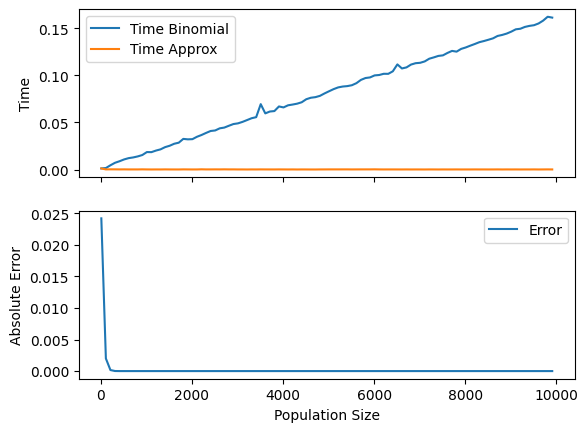

In [10]:
results = []

x_values = list(range(10, 10000, 100))

for n in x_values:
    middle_range = int(n * 0.3)  # 30% on each side
    middle_start = middle_range
    middle_end = n - middle_range
    results.append(make_calculations(lower_bound=middle_start, upper_bound=middle_end, 
                                      population_size=n, probability_success=0.2))

results = np.array(results)

# Create two plots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot for times
ax1.plot(x_values, results[:, 0], label="Time Binomial")
ax1.plot(x_values, results[:, 1], label="Time Approx")
ax1.set_ylabel('Time')
ax1.legend()

# Plot for probabilities
ax2.plot(x_values, results[:, 2], label="Error")
ax2.set_xlabel('Population Size')
ax2.set_ylabel('Absolute Error')
ax2.legend()

# Show the plots
plt.show()

### Let's reexamine the population sizes between 0 and 1000

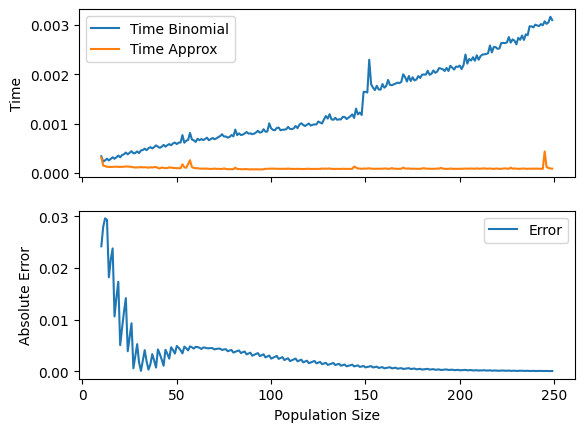

In [12]:
results = []

x_values = list(range(10, 250, 1))

for n in x_values:
    middle_range = int(n * 0.3)  # 30% on each side
    middle_start = middle_range
    middle_end = n - middle_range
    results.append(make_calculations(lower_bound=middle_start, upper_bound=middle_end, 
                                      population_size=n, probability_success=0.2))

results = np.array(results)

# Create two plots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot for times
ax1.plot(x_values, results[:, 0], label="Time Binomial")
ax1.plot(x_values, results[:, 1], label="Time Approx")
ax1.set_ylabel('Time')
ax1.legend()

# Plot for probabilities
ax2.plot(x_values, results[:, 2], label="Error")
ax2.set_xlabel('Population Size')
ax2.set_ylabel('Absolute Error')
ax2.legend()

# Show the plots
plt.show()